In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [92]:
def f_t(x,r,gamma,T,t):
    return (1 + gamma / r) * math.exp((r / (gamma * (1 - gamma))) * (T - t)) - (gamma / r)
    

In [93]:
def plot_wealth(x,r,gamma,T):
    """
    Plots the evolution of wealth over time for a given interest rate and risk aversion.
    
    Parameters:
    x (float): Initial wealth
    r (float): Interest rate
    gamma (float): Risk aversion coefficient
    T (int): Time horizon
    """
    N=100  # Number of time steps
    wealth = np.zeros(N)
    consumption = np.zeros(N)
    wealth[0] = x
    consumption[0] = x/ f_t(x,r,gamma,T,0) # Initial consumption
      # Simplified growth model
    for i in range(1, N):
      consum_ = 1 / f_t(x,r,gamma,T,i/N*T)
      wealth[i] = wealth[i-1] * (1 + (r-1/f_t(x,r,gamma,T,(i-1)/N*T))*(1/N))
      consumption[i] = wealth[i] * consum_

      # print(consum_,r-1/f_t(x,r,gamma,T,i/N*T))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6));
    ax[0].plot(np.linspace(0,1,N), consumption, label='Consumption rate', color='orange')
    ax[0].set_title('Consumption Over Time')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Consumption rate')
    ax[0].grid(True)
    # plt.legend()
    # plt.show()
    
    ax[1].plot(np.linspace(0,1,N), wealth, label='Wealth', color='blue')
    ax[1].set_title('Wealth Evolution Over Time')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Wealth')
    ax[1].grid(True)
    

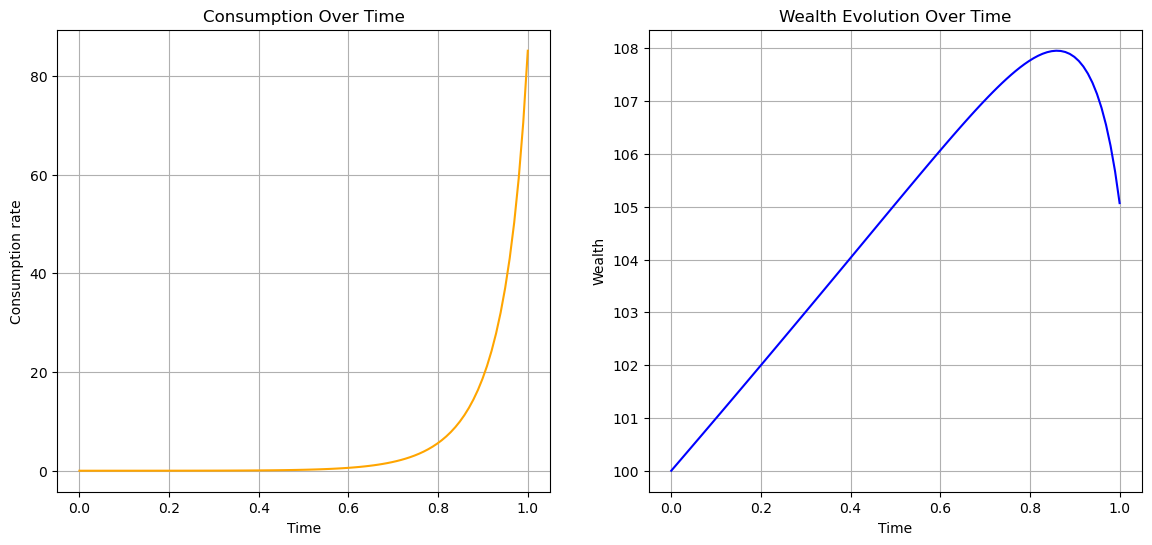

In [94]:
plot_wealth(100,0.1,.1,10)